<a href="https://colab.research.google.com/github/AKD24-pixel/Kidney_Stone_detection/blob/main/train_yolov5_object_detection_on_custom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Nov  6 10:25:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# clone YOLOv5 repository
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 18.51 MiB/s, done.
Resolving deltas: 100% (11695/11695), done.


In [ ]:
# install dependencies as necessary
!pip install -r /content/yolov5/requirements.txt
!pip uninstall wandb -qy  # deprecated dependency
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 16.1 MB/s eta 0:00:00
Setup complete. Using torch 2.5.0+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=af392008-57cb-468a-7598-9723101f24ca, L2_cache_size=4MB)


In [ ]:
%cd /content/yolov5
!pip install -q roboflow==1.1.48

import roboflow
roboflow.login()

from roboflow import Roboflow
rf = Roboflow(api_key="MQjFvJ23xDrLZ4CpmUMP")
project = rf.workspace("aryan-kaushik-sj4fm").project("kidney-stone-detecton-8xfjw")
version = project.version(4)
dataset = version.download("yolov5")


/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Kidney-stone-detecton-4 in yolov5pytorch:: 100%|██████████| 100/100 [00:00<00:00, 5608.03it/s]


In [ ]:
# train yolov5s on custom data for 25 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py \
  --img 640 \
  --batch 8 \
  --epochs 100 \
  --data {dataset.location}/data.yaml \
  --weights yolov5s.pt \
  --name yolov5s_results  \
  --cache

/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
2024-11-06 10:28:24.473426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-06 10:28:24.499076: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-06 10:28:24.506400: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=

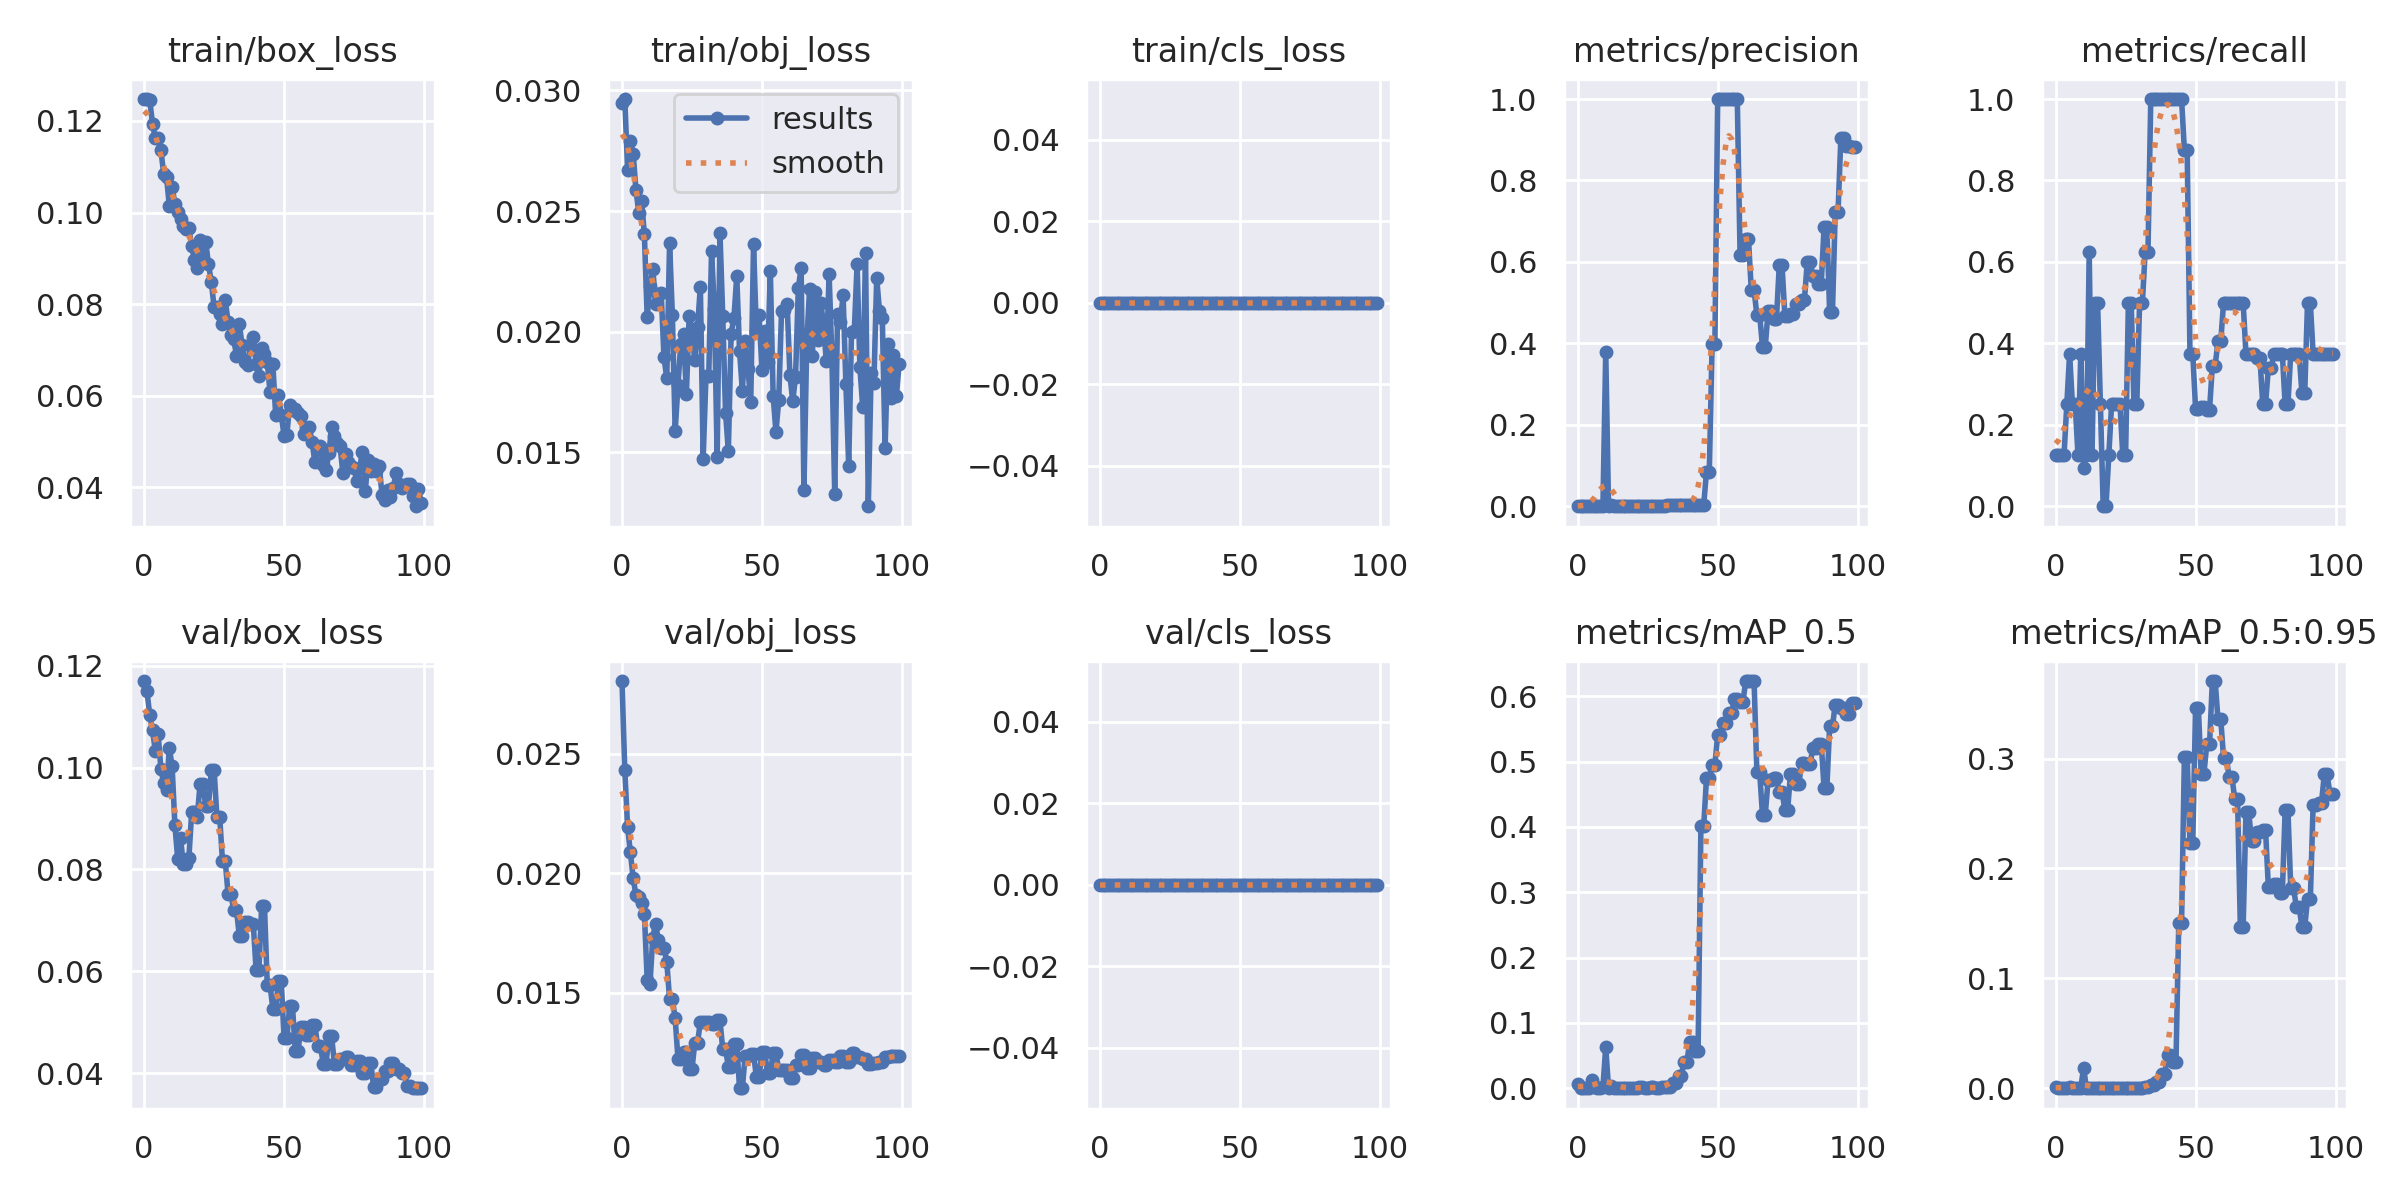

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)

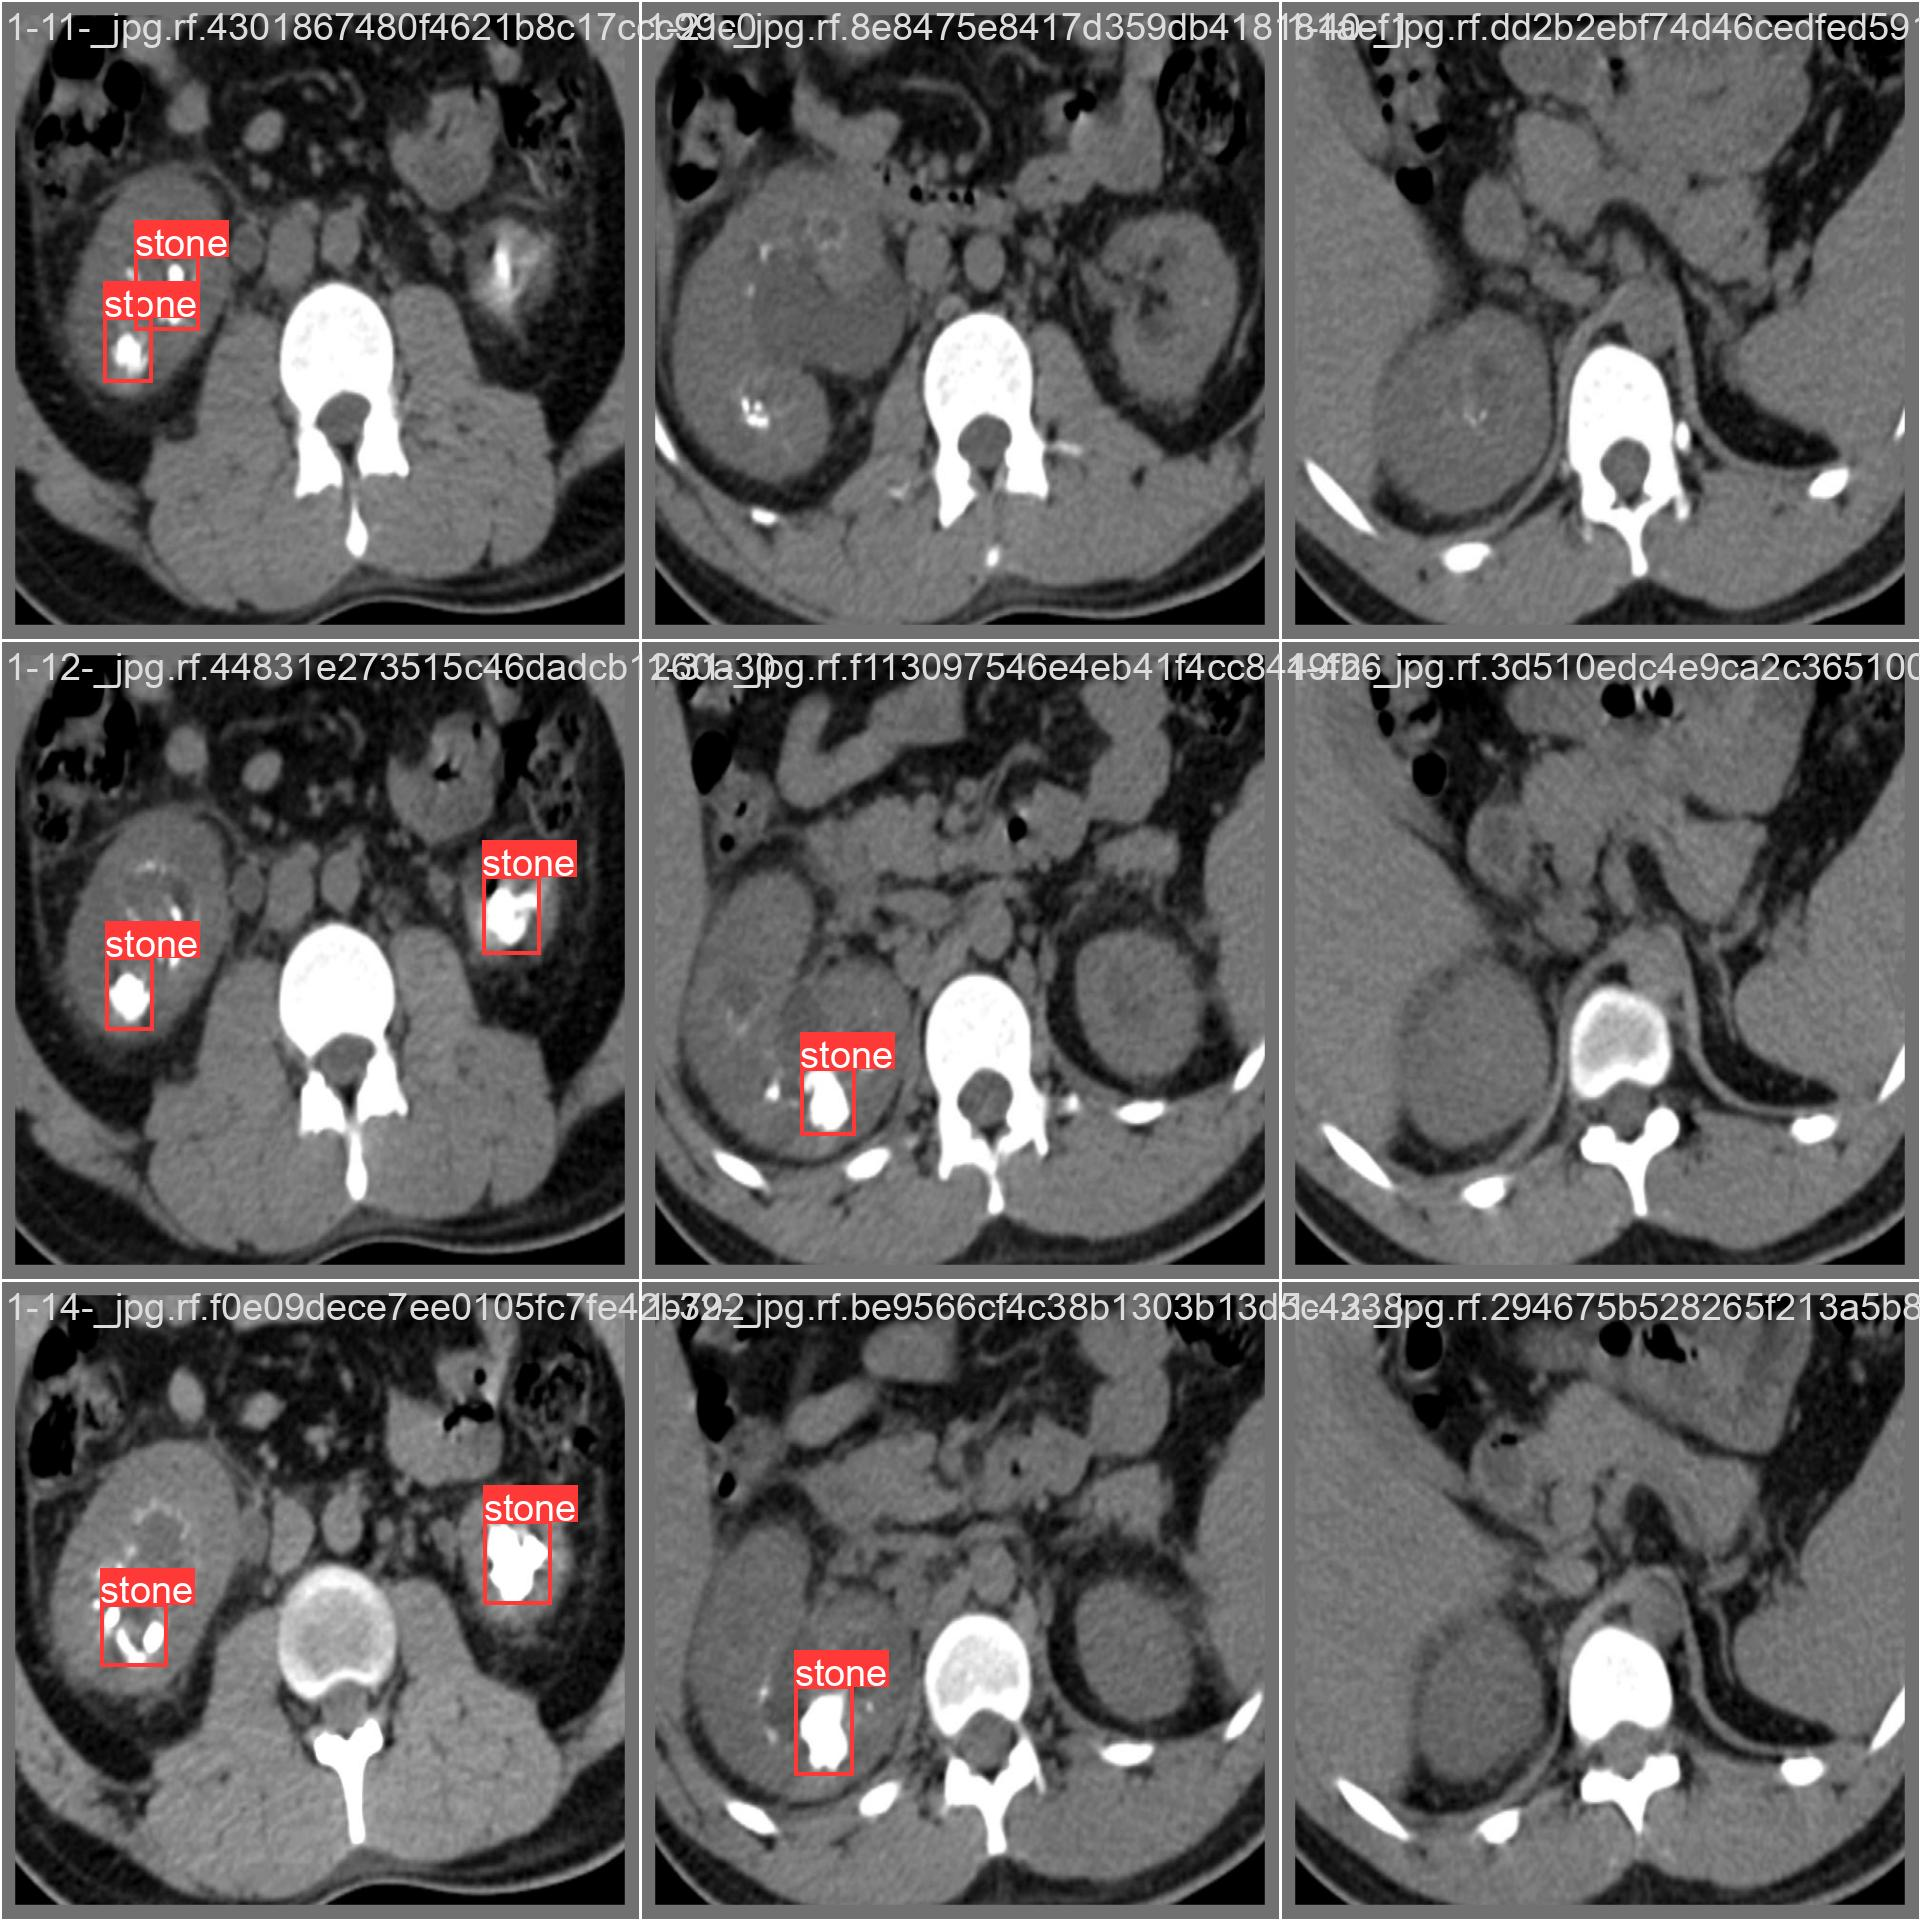

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


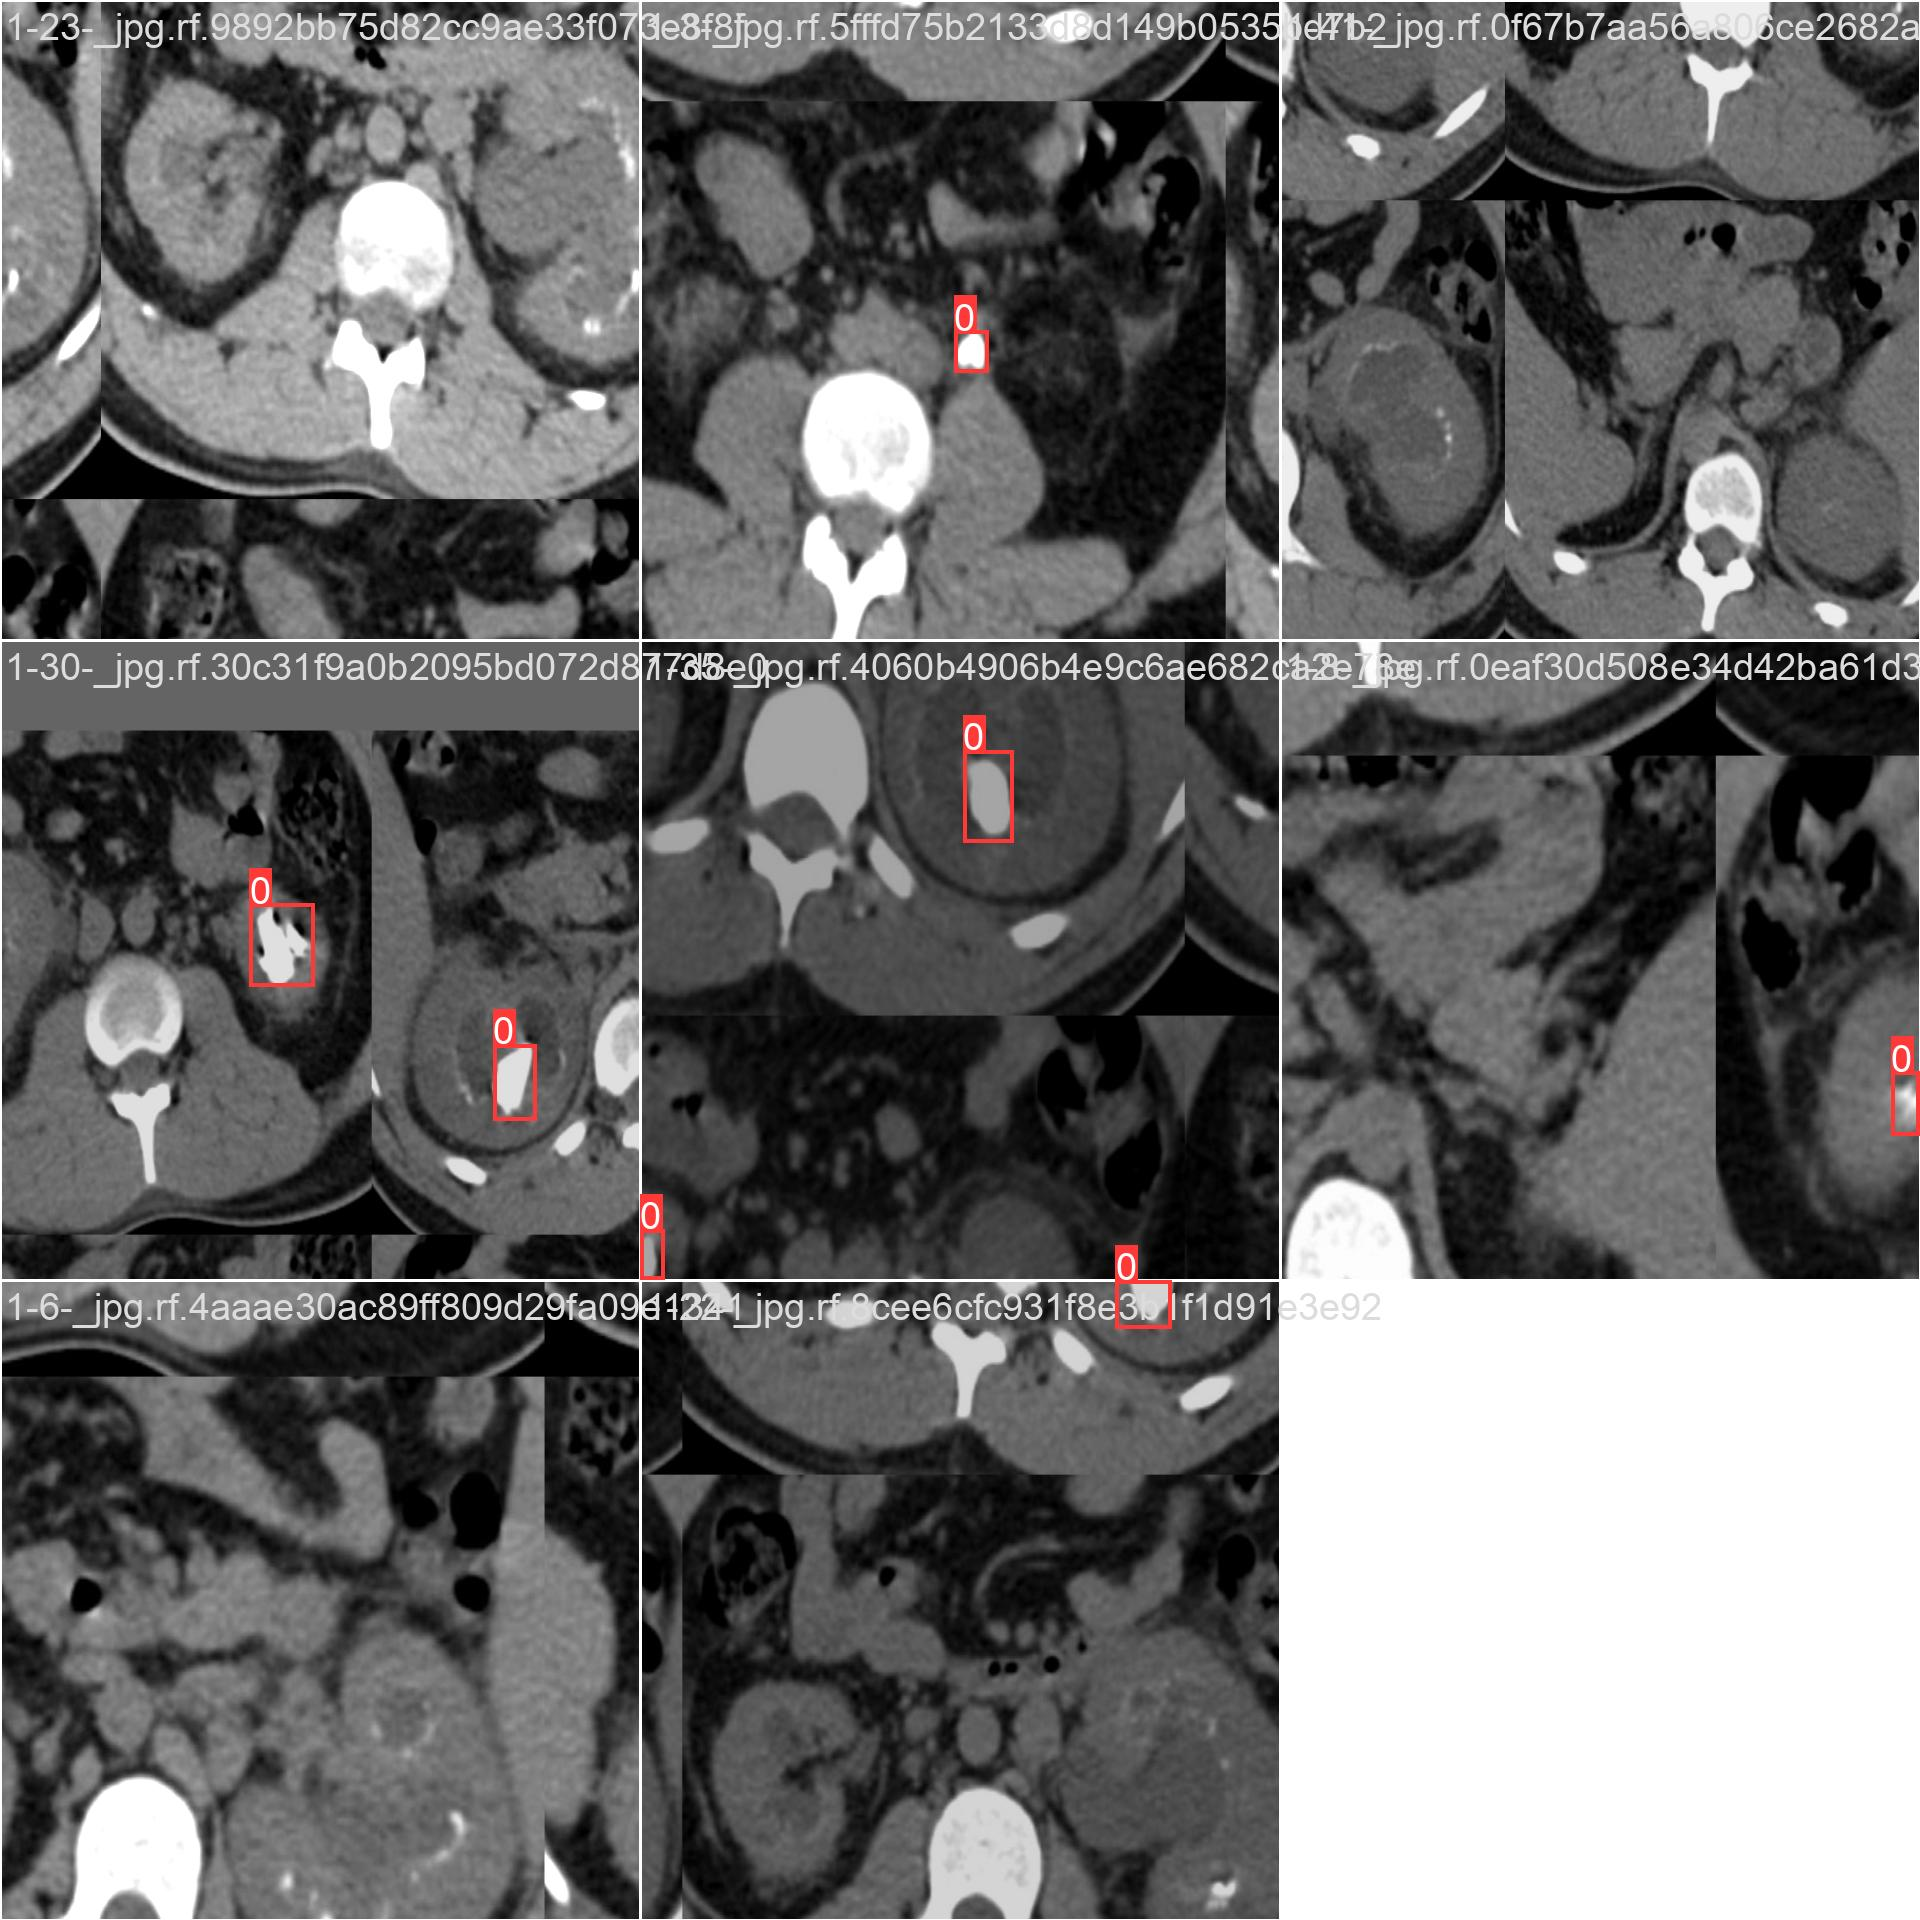

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images/

/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/yolov5/Kidney-stone-detecton-4/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/4 /content/yolov5/Kidney-stone-detecton-4/test/images/1-26-_jpg.rf.884dd492900ef504870e05b638bae89b.jpg: 640x640 (no detections), 11.5ms
image 2/4 /content/yolov5/Kidney-stone-detecton-4/test/images/1-33-_jpg.rf.cc34de588fcd9c7bb1af7857c7151749.j

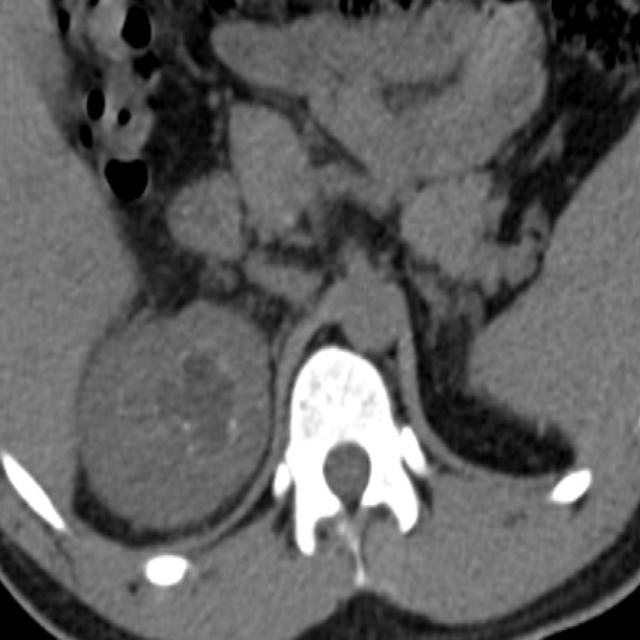

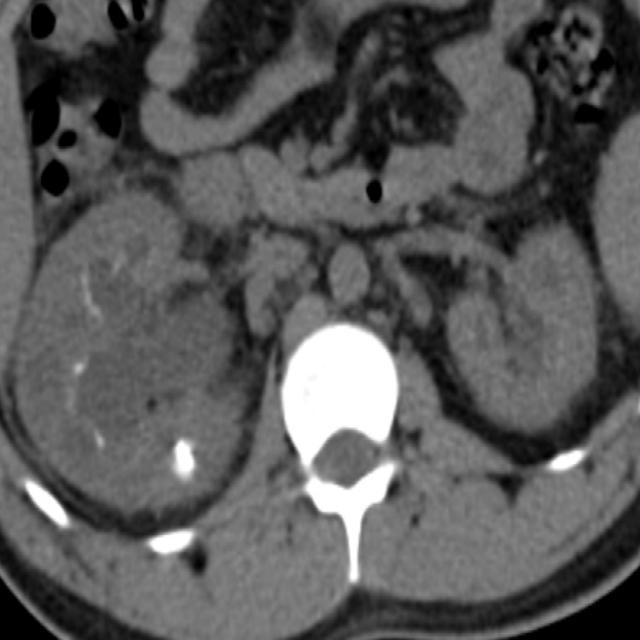

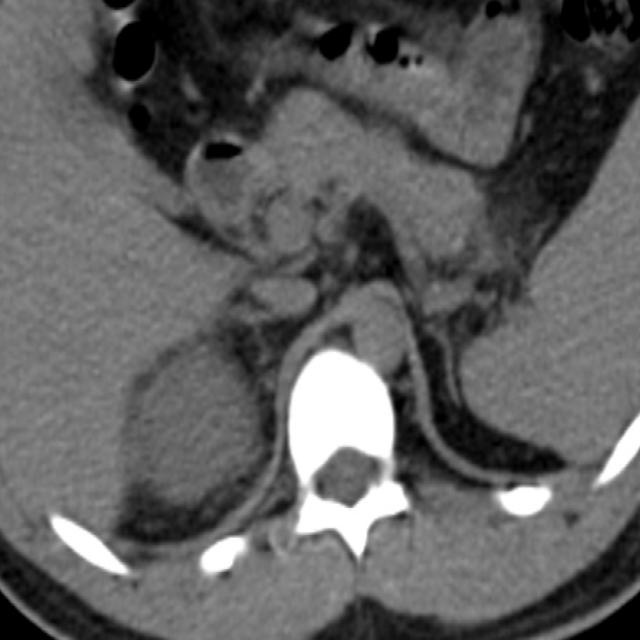

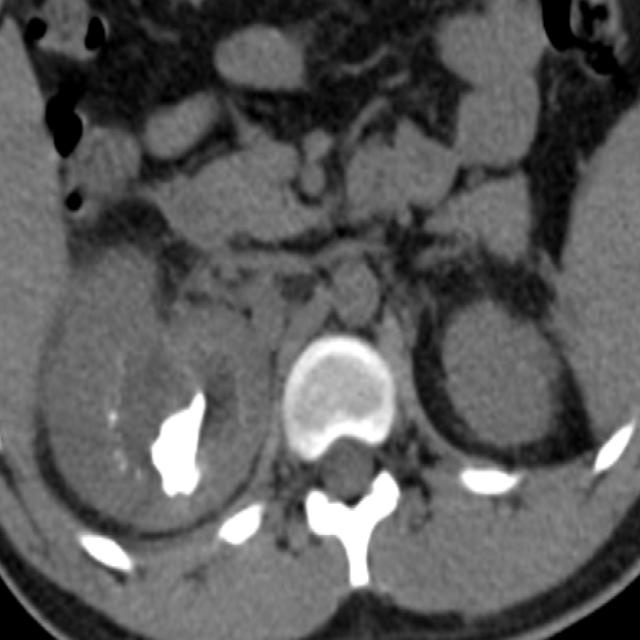

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))

True labels (y_true): [1, 0, 1, 0]
Predicted labels (y_pred): [0, 0, 1, 0]


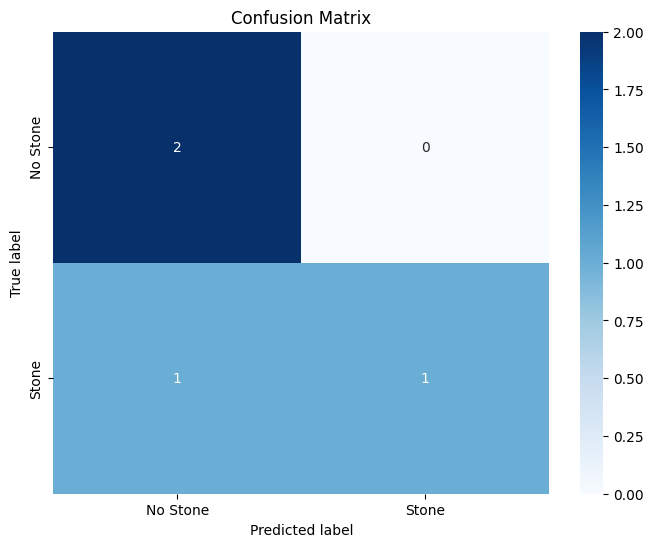

Accuracy: 0.75
Sensitivity (Recall): 0.50
Specificity: 1.00
Precision: 1.00
F1 Score: 0.67


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Define paths
ground_truth_path = '/content/yolov5/Kidney-stone-detecton-4/test/labels'  # Replace with your path
predicted_images_path = '/content/yolov5/runs/detect/exp'  # Replace with your path

# Load ground truth labels
y_true = []
for label_file in os.listdir(ground_truth_path):
    if label_file.endswith('.txt'):
        label_path = os.path.join(ground_truth_path, label_file)
        # If the file has content, it means a stone is present
        if os.path.getsize(label_path) > 0:
            y_true.append(1)  # Stone present
        else:
            y_true.append(0)  # No stone

# Load predicted labels
y_pred = []
for label_file in os.listdir(ground_truth_path):  # Loop over ground truth files to keep order consistent
    image_file = label_file.replace('.txt', '.jpg')  # Assuming .jpg images for predictions
    if image_file in os.listdir(predicted_images_path):
        y_pred.append(1)  # Stone detected
    else:
        y_pred.append(0)  # No stone detected

# Print labels to verify
print("True labels (y_true):", y_true)
print("Predicted labels (y_pred):", y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])  # 0 = No stone, 1 = Stone

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stone', 'Stone'], yticklabels=['No Stone', 'Stone'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

# Add this line to explicitly display the plot in Jupyter or similar environments
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
sensitivity = recall_score(y_true, y_pred)  # Sensitivity is recall for positive class
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
